In [2]:
# Dependencies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as sts 
import os

In [88]:
# Australia Bushfires 1991-2020

# CSV file paths
bushfire_file = os.path.join("Resources","bushfire_data2.csv")

# Read CSV files
bushfire_data = pd.read_csv(bushfire_file, encoding="ISO-8859-1")

# Create dataframe with Bushfire Data filtered for period
bushfire_df = bushfire_data.loc[:,["year","state","area burned ha"]]
bushfire_df = bushfire_df.dropna()
# bushfire_df = bushfire_df.loc[bushfire_df["year"] > 1990,:]

# Create stats dataframe for bushfire data
bushfire_sum = bushfire_df.groupby("year").sum()
bushfire_count = bushfire_df.groupby("year").count()
bushfire_stats = bushfire_sum
bushfire_stats["Number of Bushfires"] = bushfire_count["state"]
bushfire_stats = bushfire_stats.reset_index()
bushfire_stats = bushfire_stats.rename(columns={"area burned ha":"Burned Area (ha)","year":"Year"})

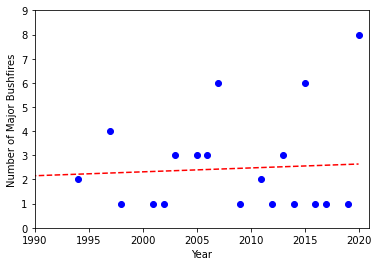

In [89]:
# Assign dataframe columns to lists
years = bushfire_stats["Year"]
number_of_bushfires = bushfire_stats["Number of Bushfires"]
total_burned_area = bushfire_stats["Burned Area (ha)"]

# Australia Number of Bushfires - Linear regression
bf_slope, bf_int, bf_r, bf_p, bf_std_err = sts.linregress(years, number_of_bushfires)
bf_fit = bf_slope * years + bf_int

# Print plot for Australia Number of Bushfires
plt.scatter(years,number_of_bushfires, color="blue")
plt.plot(years,bf_fit,"--",color="red")
plt.xlabel('Year')
plt.ylabel('Number of Major Bushfires')
plt.xlim(1990,2021)
plt.ylim(0,9)
plt.show()

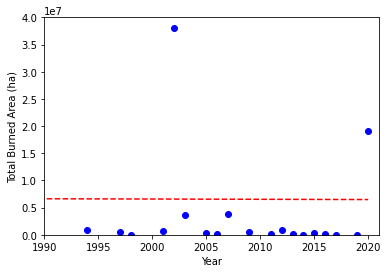

In [90]:
# Australia Burned Area - Linear regression
bf_slope, bf_int, bf_r, bf_p, bf_std_err = sts.linregress(years, total_burned_area)
bf_fit = bf_slope * years + bf_int

# Print plot for Australia Burned Area 
plt.scatter(years,total_burned_area, color="blue")
plt.plot(years,bf_fit,"--",color="red")
plt.xlabel('Year')
plt.ylabel('Total Burned Area (ha)')
plt.xlim(1990,2021)
plt.ylim(0,40000000)
plt.show()